# 01 Import Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Add the file directory to sys.path
results_dir = ''

In [5]:
alpha_beta=[-.3, -.7]

# 02 Load NGS results

In [ ]:
csv_file_path = results_dir + 'NGS_results_exact.csv'
NGS_results_exact = pd.read_csv(csv_file_path)
num_itr_NGS_exact = np.array(NGS_results_exact['num_itr'])
sup_err_NGS_exact = np.array(NGS_results_exact['sup_err'])

# 03 Plot fixed and adaptive altogether

In [7]:
csv_file_path = results_dir + f'LSP_results_exact_fixed_basis_jacobi_{alpha_beta[0]}_{alpha_beta[1]}_last_iterate_shrink_lr.csv'
LSP_results_exact = pd.read_csv(csv_file_path)
num_itr_LSP = np.array(LSP_results_exact['num_itr'])
sup_err_LSP_5 = np.array(LSP_results_exact['sup_err_5'])
sup_err_LSP_7 = np.array(LSP_results_exact['sup_err_7'])
sup_err_LSP_9 = np.array(LSP_results_exact['sup_err_9'])

In [8]:
csv_file_path = results_dir + f'LSP_results_exact_boosted_jacobi_{alpha_beta[0]}_{alpha_beta[1]}.csv'
LSP_results_exact_boosted = pd.read_csv(csv_file_path)
num_itr_LSP_boosted = np.array(LSP_results_exact_boosted['num_itr'])
sup_err_LSP_boosted = np.array(LSP_results_exact_boosted['sup_err'])

In [9]:
csv_file_path = results_dir + f'LSP_results_exact_boosted_breaks_jacobi_{alpha_beta[0]}_{alpha_beta[1]}.csv'
LSP_results_exact_boosted_breaks = pd.read_csv(csv_file_path)
breaks = np.array(LSP_results_exact_boosted_breaks['breaks'])

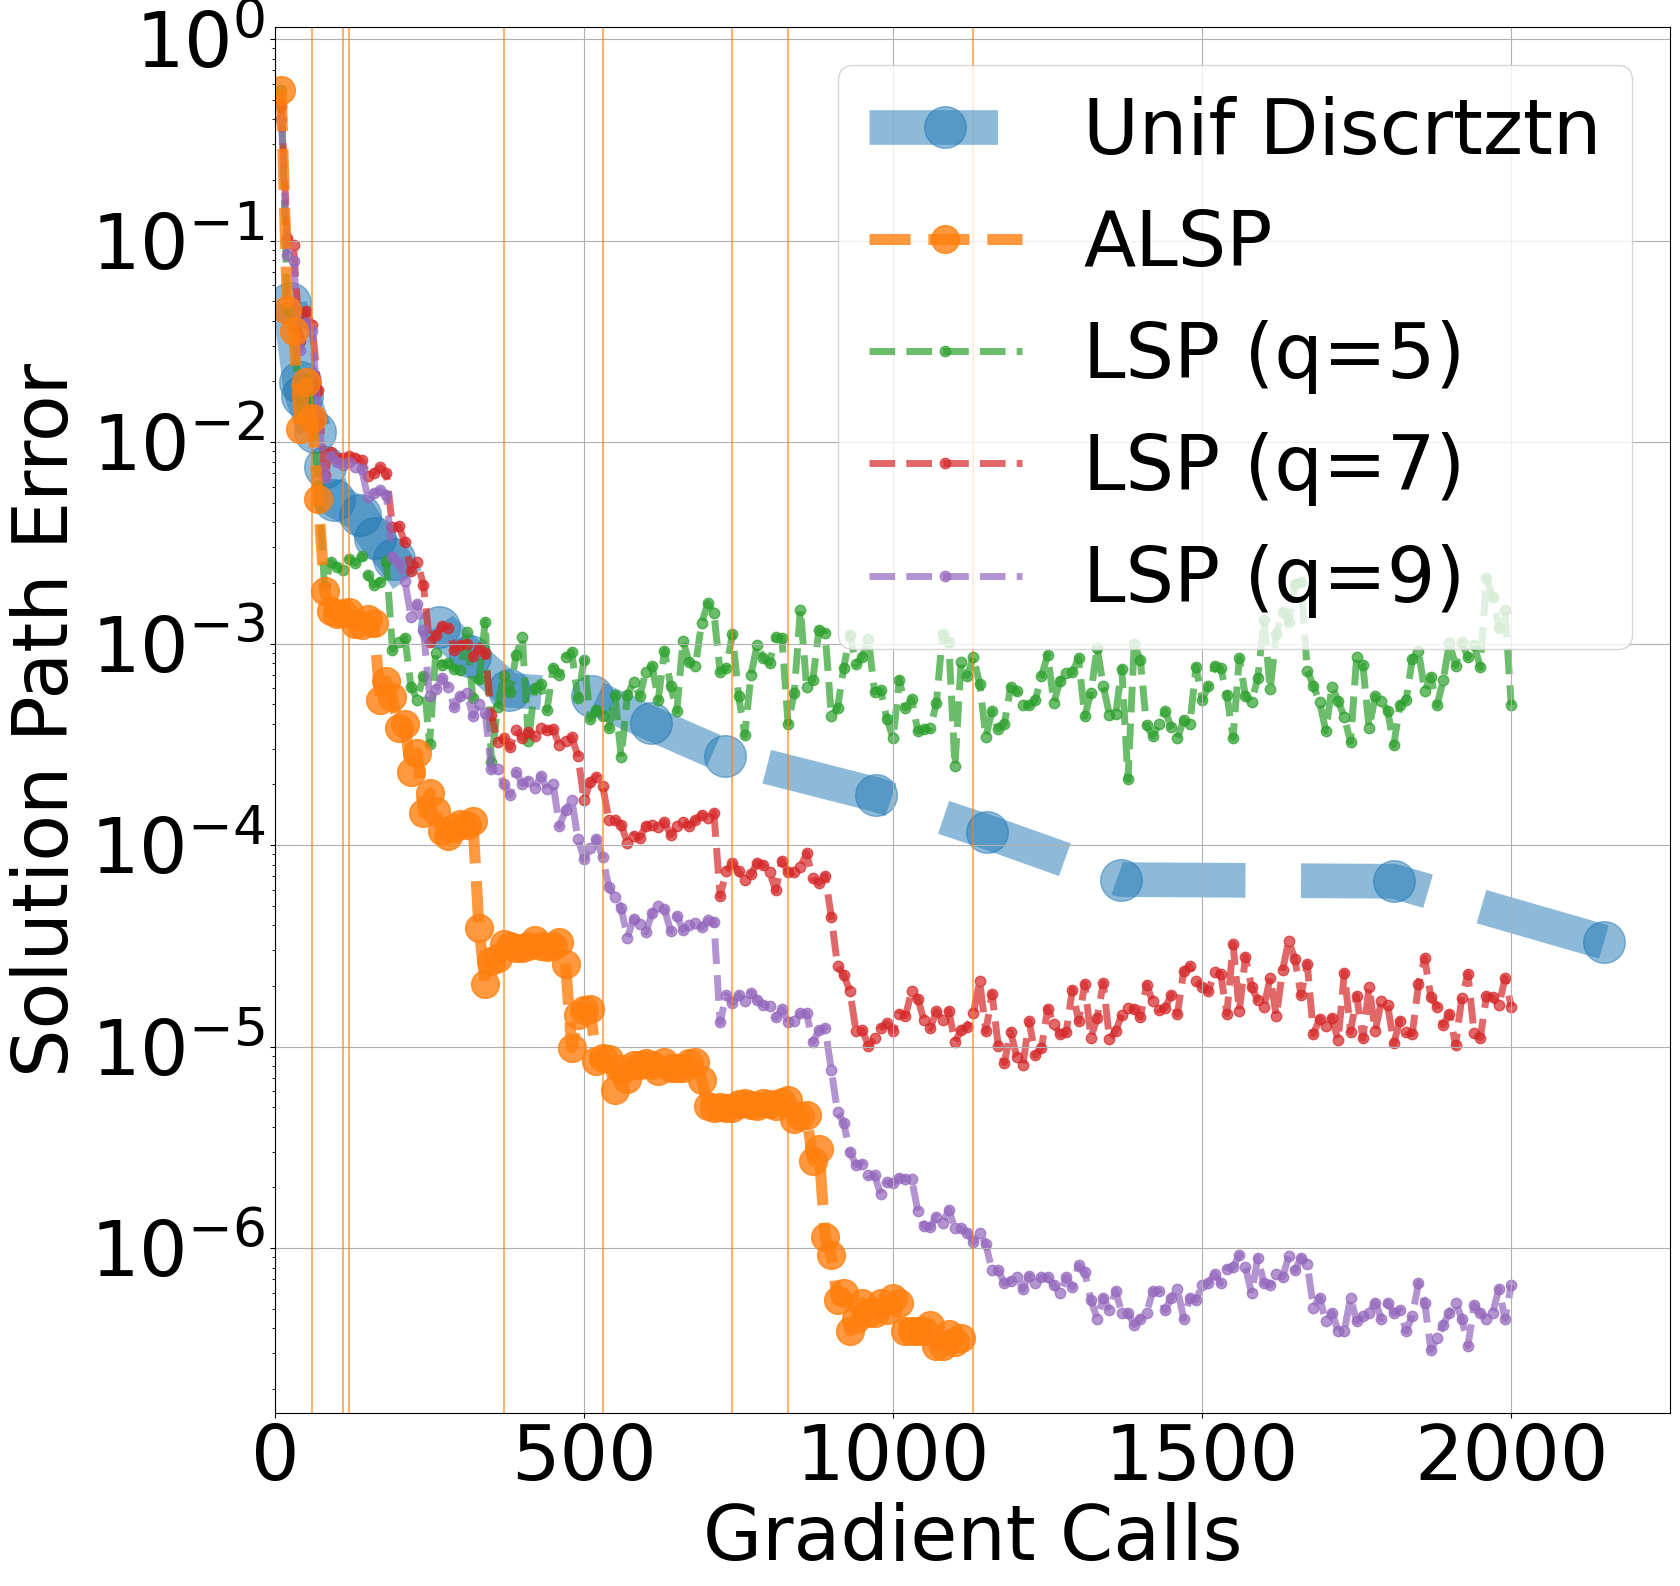

In [10]:
# plot result of learning the solution path for every 100 gradient calls
plt.figure(figsize=(18,18))
plt.plot((num_itr_NGS_exact[:len(num_itr_NGS_exact)-4]), (sup_err_NGS_exact[:len(num_itr_NGS_exact)-4]), '--o', linewidth=25, markersize=30, label = "Unif Discrtztn", alpha=0.5, zorder=0)
for break_itr in breaks:
    plt.axvline(x = break_itr, color='tab:orange', alpha=0.6)
plt.plot((num_itr_LSP_boosted), (sup_err_LSP_boosted), '--o', linewidth=8, markersize=20, label = "ALSP", alpha=0.8, zorder=2)
plt.plot((num_itr_LSP), (sup_err_LSP_5), '--.', linewidth=5, markersize=15, label = "LSP (q=5)", alpha=0.7, zorder=1)
plt.plot((num_itr_LSP), (sup_err_LSP_7), '--.', linewidth=5, markersize=15, label = "LSP (q=7)", alpha=0.7, zorder=1)
plt.plot((num_itr_LSP), (sup_err_LSP_9), '--.', linewidth=5, markersize=15, label = "LSP (q=9)", alpha=0.7, zorder=1)

# Set global font size
mpl.rcParams['font.size'] = 55

font_size = 55

# Tick labels
plt.yscale('log')

# ticks = np.arange(-6, 1, 1, dtype=float)  # Tick positions in powers of 10
# tick_labels = [f'$10^{{{t}}}$' for t in ticks]  # LaTeX-formatted labels

# Set the y-ticks and labels

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# plt.yticks(10**(ticks), tick_labels, fontsize=font_size)
plt.xlim(0, )
# Legend, if applicable
plt.legend(fontsize=font_size, loc=1)

plt.xlabel('Gradient Calls', fontsize=font_size)
plt.ylabel('Solution Path Error', fontsize=font_size)
plt.grid(True)

# Show the plot
# plt.show()

plt.savefig("itr_exact.png")

# 04 Plot error accross $\Lambda$

In [6]:
csv_file_path = results_dir + f'LSP_errs_jacobi_{alpha_beta[0]}_{alpha_beta[1]}.csv'
LSP_errs_legendre = pd.read_csv(csv_file_path)
lambdas = np.array(LSP_errs_legendre['lambdas'])
errs_5 = np.array(LSP_errs_legendre['err_5'])
errs_7 = np.array(LSP_errs_legendre['err_7'])
errs_9 = np.array(LSP_errs_legendre['err_9'])

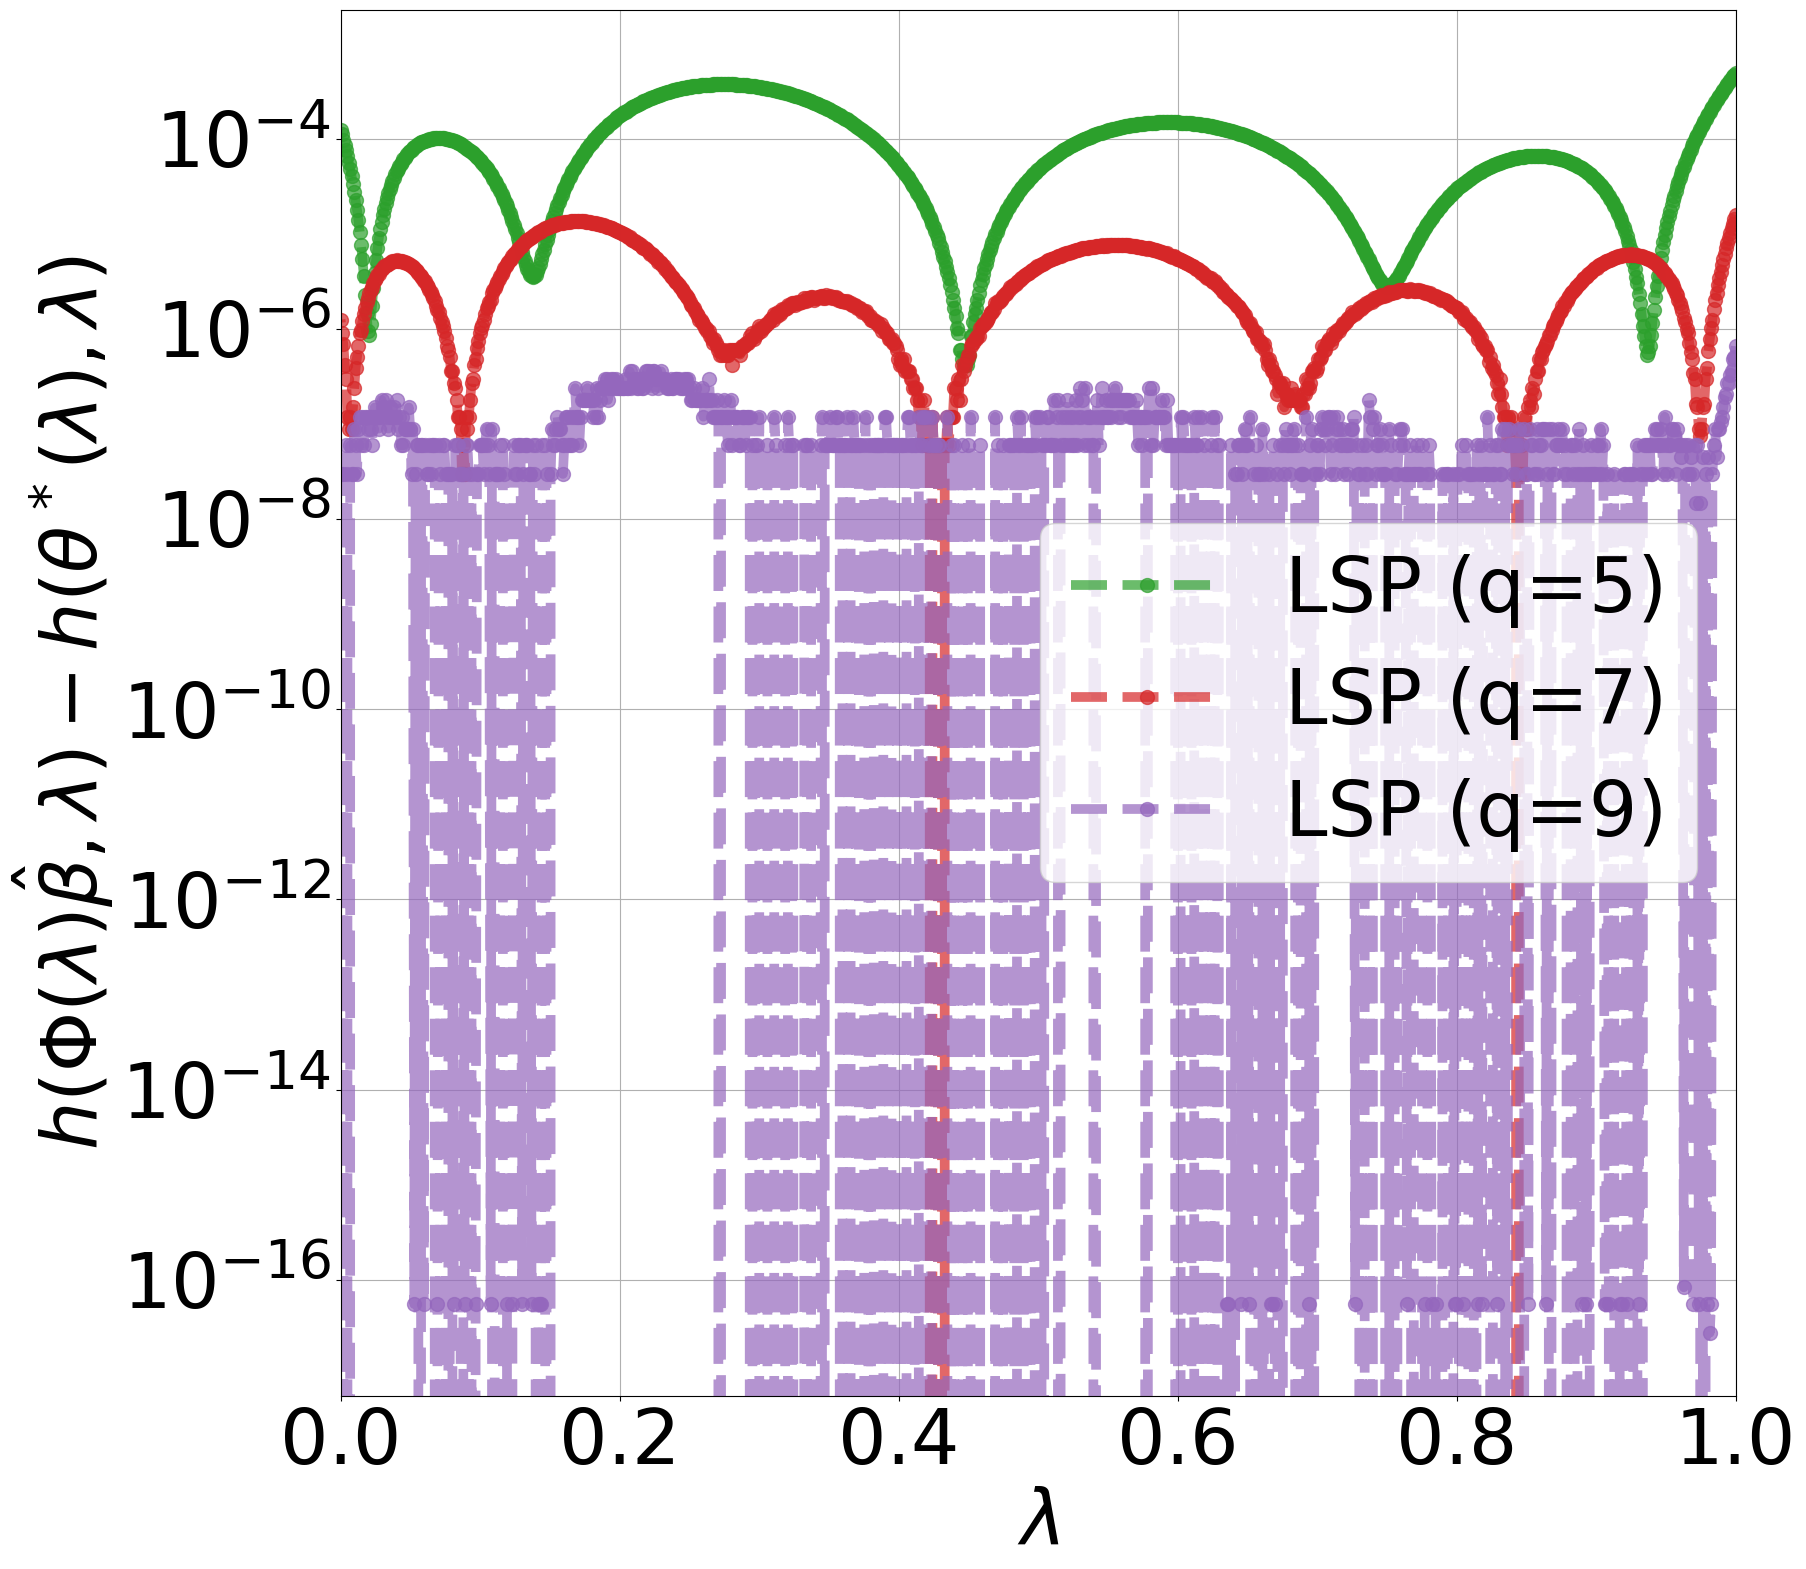

In [7]:
# plot result of our method:
plt.figure(figsize=(18,18))

plt.plot(lambdas, errs_5, '--o', linewidth=7, markersize=10, color='#2ca02c', label=f'LSP (q=5)', alpha=.7)
plt.plot(lambdas, errs_7, '--o', linewidth=7, markersize=10, color='#d62728', label=f'LSP (q=7)', alpha=.7)
plt.plot(lambdas, errs_9, '--o', linewidth=7, markersize=10, color='#9467bd', label=f'LSP (q=9)', alpha=.7)
# plt.plot(lam_laguerre/(1 + lam_laguerre), errs_laguerre, '--o', linewidth=7, markersize=10, label=f'LSP-9 Legendre', alpha=.7)

mpl.rcParams['font.size'] = 55

font_size = 55

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.xlim(0, 1)

plt.yscale('log')

plt.xlabel(f'$\\lambda$', fontsize=font_size)
plt.ylabel(f"$h(\\Phi(\\lambda)\\hat\\beta, \\lambda) - h(\\theta^*(\\lambda), \\lambda)$", fontsize=font_size)
plt.legend(fontsize=font_size)
plt.grid(True)

plt.savefig("dummy.png")